## Loading some libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Data Loading and Exploration

In [17]:
df = pd.read_csv('clean_data-1.csv')
df.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591


In [18]:
df.shape

(85870, 8)

In [19]:
df.isna().sum()

year                    0
month                   0
stateDescription        0
sectorName              0
customers           26040
price                   0
revenue                 0
sales                   0
dtype: int64

In [20]:
df.nunique()

year                   24
month                  12
stateDescription       62
sectorName              6
customers           45038
price                2943
revenue             78693
sales               79292
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85870 entries, 0 to 85869
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              85870 non-null  int64  
 1   month             85870 non-null  int64  
 2   stateDescription  85870 non-null  object 
 3   sectorName        85870 non-null  object 
 4   customers         59830 non-null  float64
 5   price             85870 non-null  float64
 6   revenue           85870 non-null  float64
 7   sales             85870 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 5.2+ MB


In [22]:
df['customers'].unique()[:20]

array([         nan, 3.145488e+06, 0.000000e+00, 1.414200e+04,
       2.611383e+06, 1.000000e+00, 4.820789e+06, 5.167520e+05,
       1.252200e+04, 4.291514e+06, 2.542667e+06, 2.675370e+05,
       8.233000e+03, 2.266896e+06, 1.462617e+06, 2.235460e+05,
       7.137000e+03, 1.231934e+06, 9.404000e+03, 3.189000e+03])

## Data Cleaning and Preprocessing

In [91]:
# filling nan values with the mean of eacg stateDescription
# performin a groupby on stateDescription and filling the nan values with the mean of each stateDescription
df['customers'] = df['customers'].fillna(df.groupby('stateDescription')['customers'].transform('mean'))

In [93]:
df.isna().sum()

year                0
month               0
stateDescription    0
sectorName          0
customers           0
price               0
revenue             0
sales               0
dtype: int64

In [106]:
df_1 = df.copy()

In [107]:
df_1.shape

(85870, 8)

In [108]:
df_1.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,134900.974093,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,134900.974093,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,134900.974093,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,134900.974093,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,134900.974093,6.01,15.07136,250.60591


In [109]:
df.nunique()

year                   24
month                  12
stateDescription       62
sectorName              6
customers           45100
price                2943
revenue             78693
sales               79292
dtype: int64

In [110]:
# printing unique values of the furst four columns
for col in df.columns[:4]:
    print(f'{col} : {df[col].unique()} \n')

year : [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024] 

month : [ 1  2  3  4  5  6  7  8  9 10 11 12] 

stateDescription : ['Wyoming' 'New England' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Alabama' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts'
 'Michigan' 'Minnesota' 'Mississippi' 'Middle Atlantic'
 'Pacific Contiguous' 'Pacific Noncontiguous' 'U.S. Total' 'Missouri'
 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico'
 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon'
 'Rhode Island' 'Alaska' 'Arizona' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'East North Central' 'West North Central' 'South Atlantic'
 'East South Central' 'West South Central' 'Mountain' 'Pennsy

In [111]:
# saving the cleaned data
df_1.to_csv('clean_data-2.csv', index=False)

In [112]:
# identifying the categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['stateDescription', 'sectorName'], dtype='object')

In [113]:
# convert all categorical columns to numerical using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df_1[cat_cols] = encoder.fit_transform(df_1[cat_cols])

# saving this encoder
from joblib import dump

dump(encoder, 'cat_encoder.joblib')

['cat_encoder.joblib']

In [114]:
# checking the encoder properties
encoder.categories_

[array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
        'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
        'East North Central', 'East South Central', 'Florida', 'Georgia',
        'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
        'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
        'Michigan', 'Middle Atlantic', 'Minnesota', 'Mississippi',
        'Missouri', 'Montana', 'Mountain', 'Nebraska', 'Nevada',
        'New England', 'New Hampshire', 'New Jersey', 'New Mexico',
        'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
        'Oregon', 'Pacific Contiguous', 'Pacific Noncontiguous',
        'Pennsylvania', 'Rhode Island', 'South Atlantic', 'South Carolina',
        'South Dakota', 'Tennessee', 'Texas', 'U.S. Total', 'Utah',
        'Vermont', 'Virginia', 'Washington', 'West North Central',
        'West South Central', 'West Virginia', 'Wisconsin', 'Wyoming'],
       dtype=object),
 array

In [115]:
df_1.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,61.0,0.0,134900.974093,4.31,48.12840,1116.17208
1,2001,1,61.0,1.0,134900.974093,5.13,12.67978,247.08691
2,2001,1,61.0,2.0,134900.974093,3.26,19.60858,602.30484
3,2001,1,61.0,3.0,134900.974093,4.75,0.76868,16.17442
4,2001,1,61.0,4.0,134900.974093,6.01,15.07136,250.60591


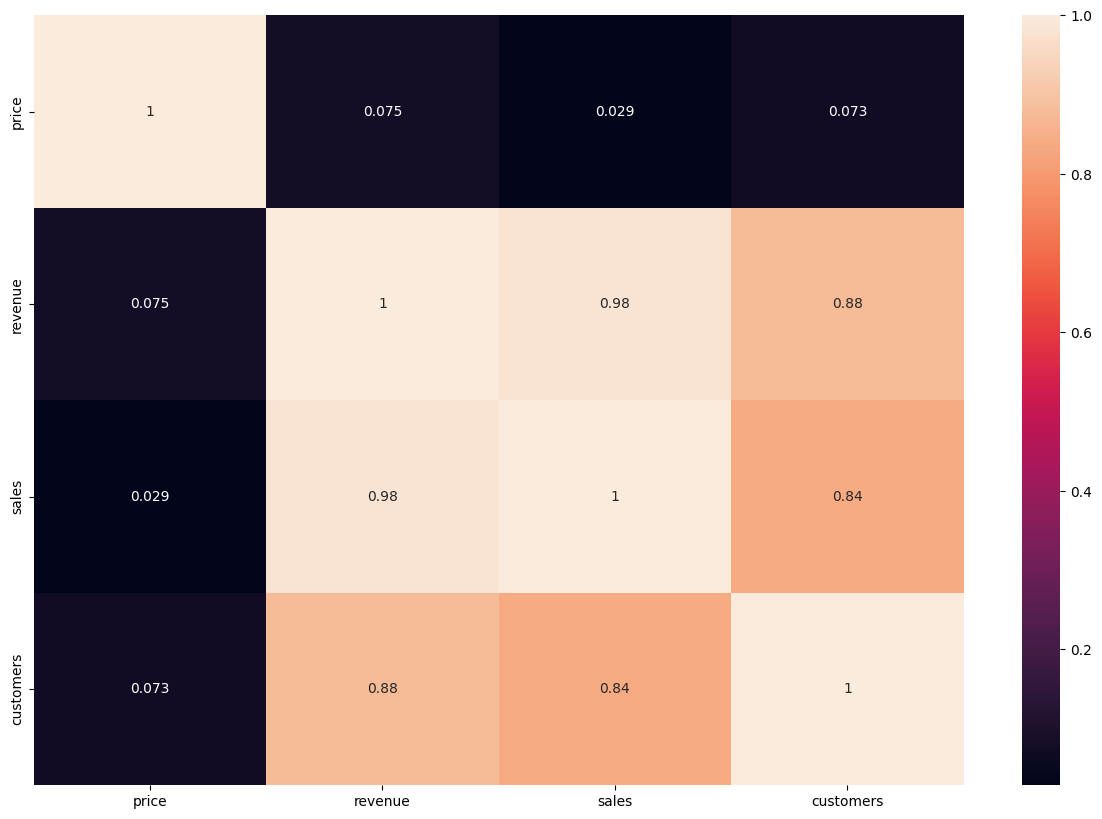

In [116]:
# looking out for correlation between price, sales and revenue
plt.figure(figsize=(15, 10))
sns.heatmap(df_1[['price', 'revenue', 'sales', 'customers']].corr(), annot=True)
plt.show()

- There is almost no correlation between the price and the company sales an revenue
- We can see that there is high correlation between the sales, customers and revenue across the data

In [117]:
df_1

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,61.0,0.0,1.349010e+05,4.31,48.12840,1116.17208
1,2001,1,61.0,1.0,1.349010e+05,5.13,12.67978,247.08691
2,2001,1,61.0,2.0,1.349010e+05,3.26,19.60858,602.30484
3,2001,1,61.0,3.0,1.349010e+05,4.75,0.76868,16.17442
4,2001,1,61.0,4.0,1.349010e+05,6.01,15.07136,250.60591
...,...,...,...,...,...,...,...,...
85865,2024,1,3.0,0.0,1.717720e+06,9.63,442.98773,4598.63147
85866,2024,1,3.0,1.0,2.086690e+05,10.26,97.79467,953.02154
85867,2024,1,3.0,2.0,3.495100e+04,7.08,109.92656,1553.02838
85868,2024,1,3.0,4.0,1.474098e+06,11.24,235.26399,2092.56172


In [118]:
# dropping the year and month columns
df_2 = df_1.copy()
df_2.head(10)

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,61.0,0.0,1.349010e+05,4.31,48.12840,1116.17208
1,2001,1,61.0,1.0,1.349010e+05,5.13,12.67978,247.08691
2,2001,1,61.0,2.0,1.349010e+05,3.26,19.60858,602.30484
3,2001,1,61.0,3.0,1.349010e+05,4.75,0.76868,16.17442
4,2001,1,61.0,4.0,1.349010e+05,6.01,15.07136,250.60591
5,2001,1,33.0,0.0,2.887698e+06,10.73,1139.89520,10622.88375
6,2001,1,48.0,3.0,1.044699e+06,6.57,5.28332,80.41336
7,2001,1,48.0,4.0,1.044699e+06,7.36,225.81673,3066.25911
8,2001,1,49.0,0.0,1.866548e+05,5.85,46.98518,803.24177
9,2001,1,49.0,1.0,1.866548e+05,5.95,15.92044,267.66283


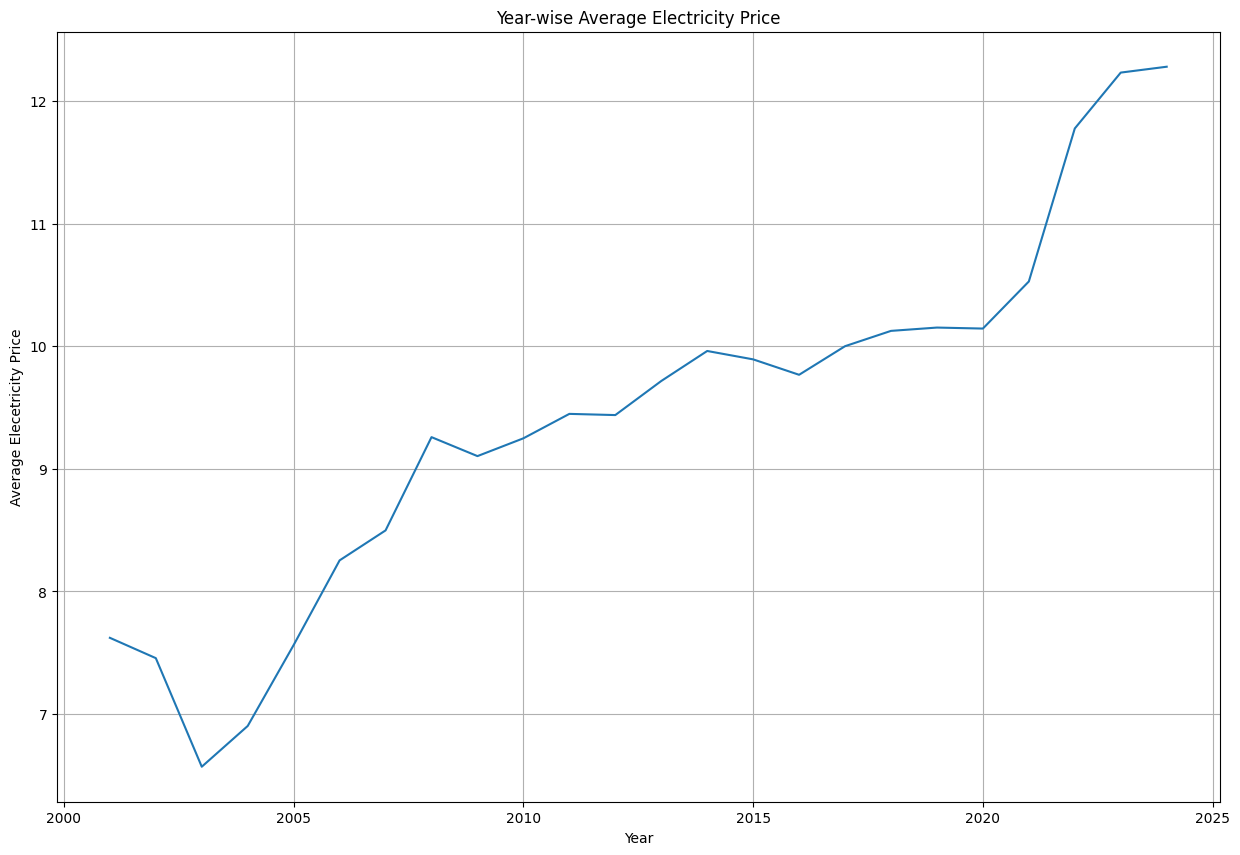

In [121]:
# checking the yearly average price of electricity
plt.figure(figsize=(15,10))
yearly_avg_price = df_2.groupby('year')['price'].mean().reset_index()
plt.plot(yearly_avg_price['year'],yearly_avg_price['price'])
plt.title('Year-wise Average Electricity Price')
plt.xlabel('Year')
plt.ylabel('Average Elecetricity Price')
plt.grid(True)
plt.show()

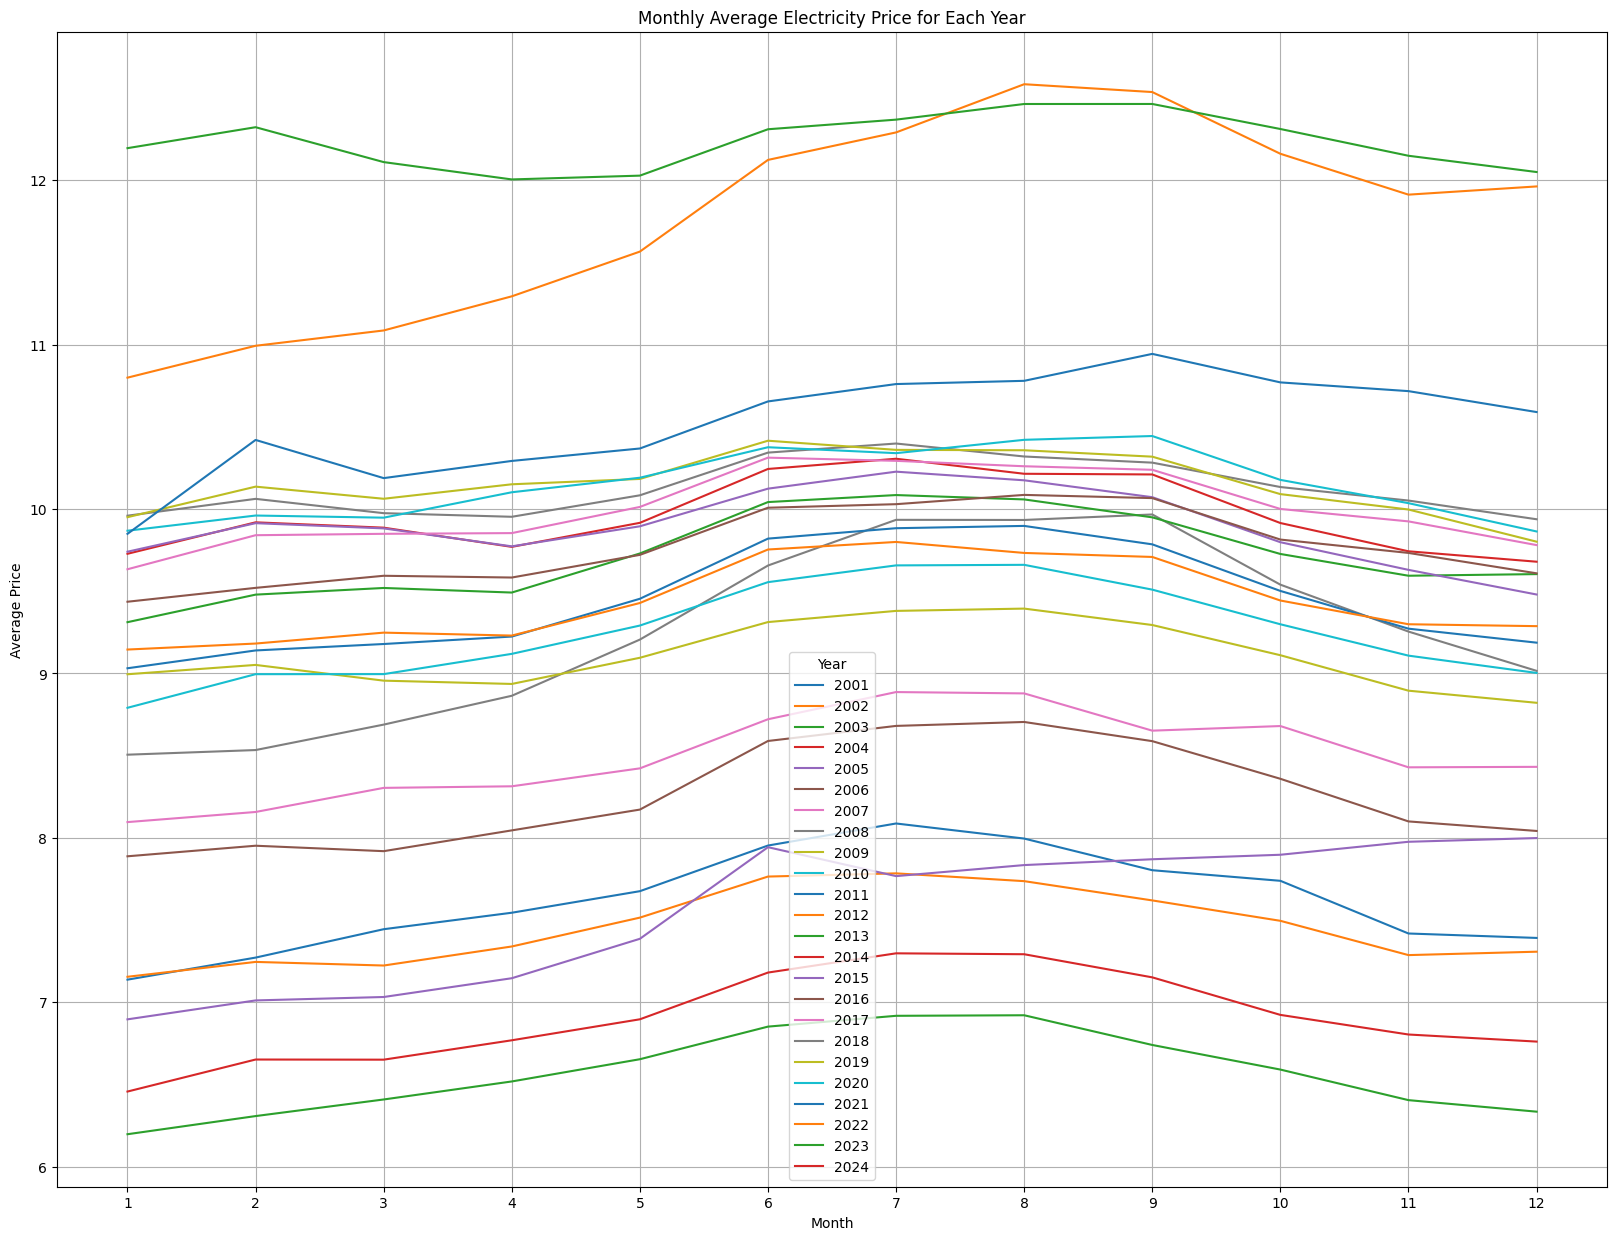

In [122]:
plt.figure(figsize=(20,15))
monthly_avg = df_2.groupby(['year','month'])['price'].mean().reset_index()
for year in monthly_avg['year'].unique():
    df_2_by_year = monthly_avg[monthly_avg['year'] == year]
    plt.plot(df_2_by_year['month'], df_2_by_year['price'], label=year)

plt.title('Monthly Average Electricity Price for Each Year')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

## Time series analysis tests

### Test for values for constant mean and variance over time.

In [123]:
### Test for values for constant mean and variance over time.
# Testing for constant mean
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_2['price'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Testing for constant variance
from statsmodels.stats.diagnostic import het_arch

p_value = het_arch(df_2['price'])[1]
print(p_value)

ADF Statistic: -18.246640
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
0.0


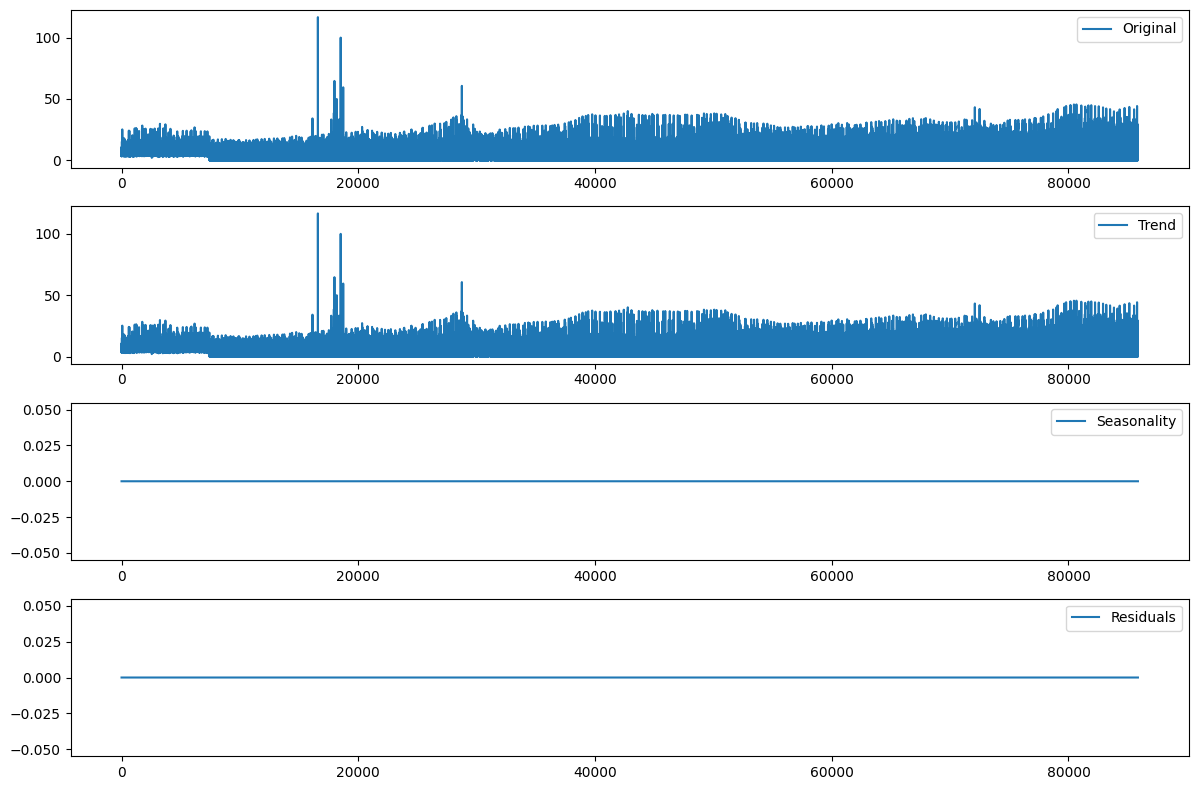

In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df_2' is your DataFrame and 'price' is your column of interest
decomposition = seasonal_decompose(df_2['price'], model='additive', period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df_2['price'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


- The Augmented Dickey-Fuller (ADF) test results indicate that your time series data is stationary. It has no trend in it.

- Here’s how to interpret the results:

- The ADF Statistic is a negative number, and the more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence. The ADF Statistic is -18.246640, which is a strong negative number.
- The p-value is 0.000000, which is less than 0.05, allowing us to reject the null hypothesis. This means the time series does not have a unit root, and in turn, indicates stationarity.
- The critical values at 1%, 5%, and 10% confidence intervals are -3.430, -2.862, and -2.567 respectively. The ADF statistic is less than the value of the critical values, which confirms that the time series is stationary.
- Now that I have established that my time series is stationary, I can apply various forecasting models like ARIMA (AutoRegressive Integrated Moving Average), which work well on stationary data.

### Performing Auto Correlation plot

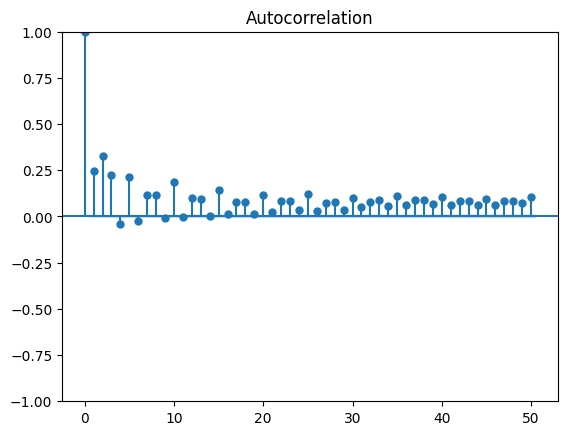

In [125]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming 'df' is your DataFrame and 'time_series' is your column of interest
plot_acf(df_2['price'])
plt.show()


- The autocorrelation plot suggests the following:

- Lag 0: As expected, there’s a perfect positive autocorrelation at lag 0 because a variable is always perfectly correlated with itself.
- Rapid Decrease: The autocorrelation decreases rapidly after lag 0, which indicates that the immediate past values have some degree of correlation with the current value.
- Stabilization: After the initial decrease, the autocorrelation coefficients stabilize close to zero, suggesting that past values are not significantly correlated with current values beyond a certain point.
- This pattern typically indicates that the time series may have some short-term predictability, where only the recent past is useful in predicting the future values. Long-term predictions would be less reliable as the autocorrelation diminishes.

- If most of the spikes in the plot fall within the confidence interval (the blue shaded area), it means that the autocorrelations are not statistically significant, and the time series might be considered white noise.

- However, if there are spikes outside of the confidence interval, those lags are considered to have significant autocorrelation and could be important for your time series model.

## Preparing for modeling

In [127]:
# using data available till 2020 for training, while those after 2020 for testing
# getting the index of the last datapoint for 2020

last = df_2[df_2['year'] == 2020].index[-1]
print(last)
train_data = df_2['price'].iloc[:last]
test_data = df_2['price'].iloc[last:]


74399


## Modeling

### Arima

In [128]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1,1,1)) # change the order parameters based on your data
model_fit = model.fit()

# make prediction on test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)


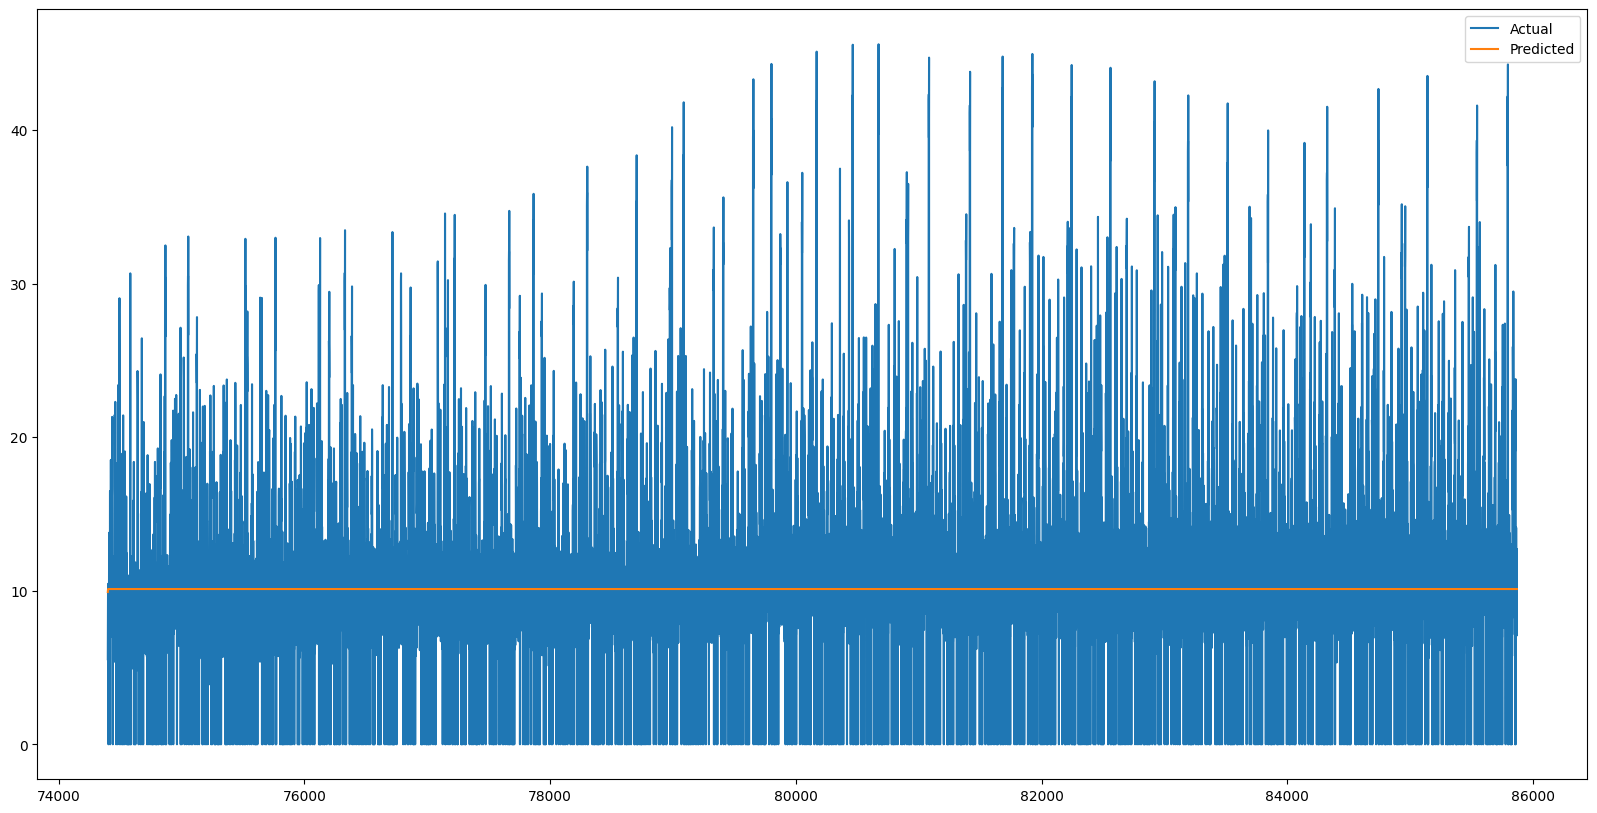

In [129]:
# making a plot to see actual vs predicted values
plt.figure(figsize=(20,10))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.legend()
plt.show()


In [130]:
test_data[:20], predictions[:20]

(74399     5.54
 74400     8.53
 74401    10.08
 74402     5.27
 74403    10.46
 74404     0.00
 74405     7.78
 74406     9.44
 74407     5.17
 74408     9.51
 74409    10.90
 74410    13.78
 74411     5.54
 74412     9.48
 74413    12.61
 74414    10.07
 74415    12.76
 74416     9.39
 74417    16.49
 74418     0.00
 Name: price, dtype: float64,
 74399     9.918097
 74400    10.078181
 74401    10.105498
 74402    10.110160
 74403    10.110955
 74404    10.111091
 74405    10.111114
 74406    10.111118
 74407    10.111119
 74408    10.111119
 74409    10.111119
 74410    10.111119
 74411    10.111119
 74412    10.111119
 74413    10.111119
 74414    10.111119
 74415    10.111119
 74416    10.111119
 74417    10.111119
 74418    10.111119
 Name: predicted_mean, dtype: float64)

In [48]:
# calculating the mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 45.050234817988986


### Sarimax

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# make prediction on test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1)


In [50]:
test_data[:20], predictions[:20]

(77283    13.66
 77284     0.00
 77285    10.85
 77286    10.81
 77287     7.65
 77288    14.92
 77289    15.42
 77290     8.18
 77291     9.69
 77292     6.82
 77293    16.11
 77294    17.41
 77295    11.66
 77296    17.60
 77297    12.33
 77298    11.80
 77299     0.00
 77300     9.23
 77301     8.50
 77302     6.77
 Name: price, dtype: float64,
 77283    12.506004
 77284    11.367399
 77285    11.079561
 77286    11.194118
 77287    10.710226
 77288    10.887206
 77289    10.953713
 77290    10.914787
 77291    10.580254
 77292    10.935189
 77293    10.488983
 77294    11.105973
 77295    11.022103
 77296    10.828058
 77297    10.813760
 77298    10.830234
 77299    11.027533
 77300    10.895266
 77301    10.970779
 77302    10.875496
 Name: predicted_mean, dtype: float64)

In [51]:
# calculating the mean squared error
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 44.48995072721109


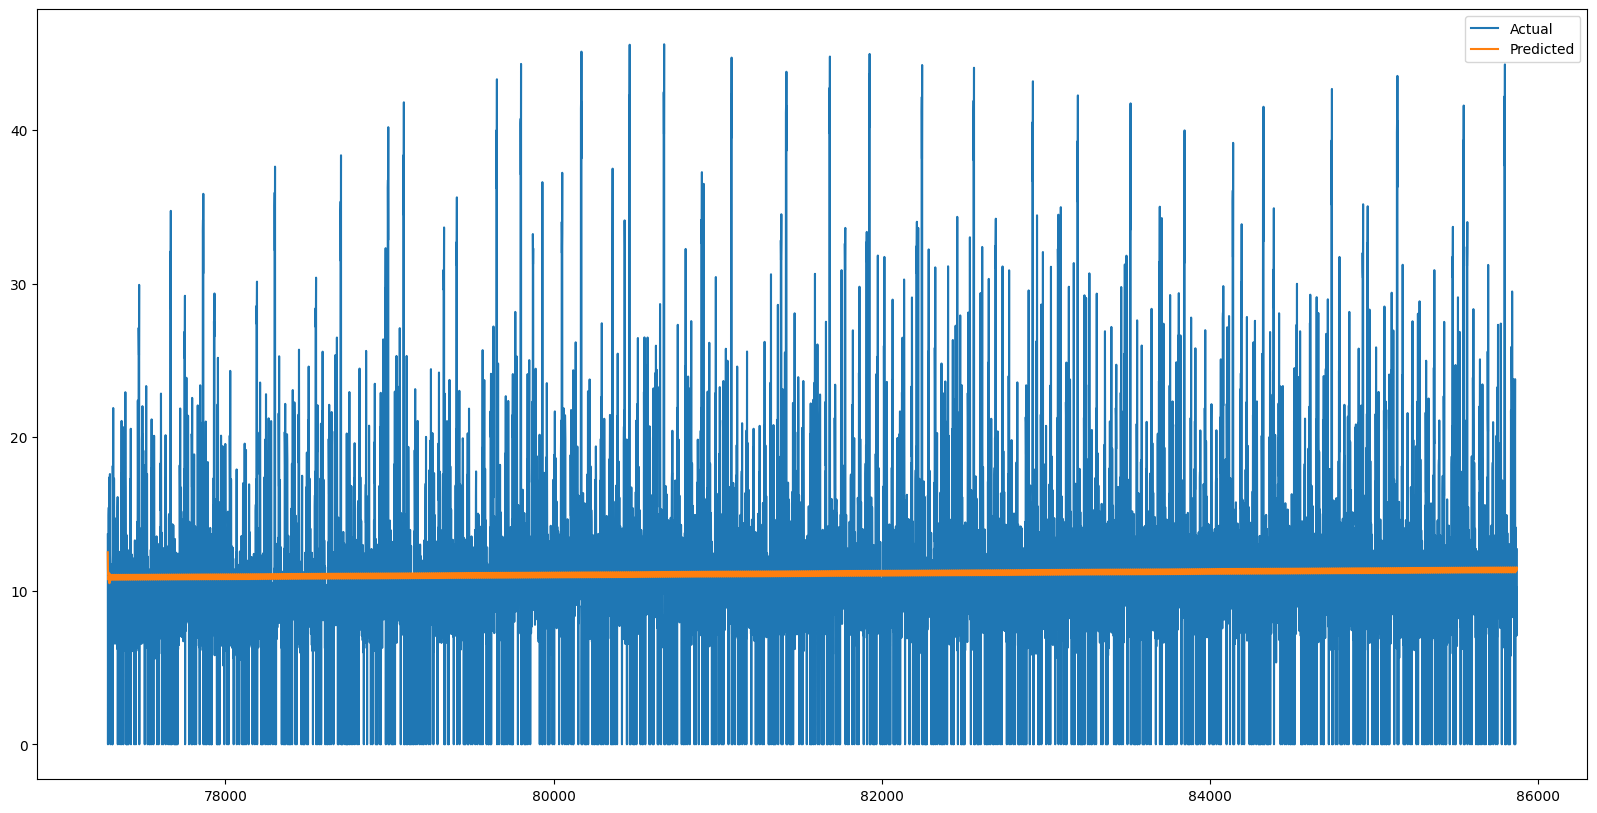

In [52]:
# making a plot to see actual vs predicted values
plt.figure(figsize=(20,10))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.legend()
plt.show()


In [131]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Create the model
model = ExponentialSmoothing(train_data)

# Fit the model
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test_data))

In [132]:
test_data[:20], forecast[:20]

(74399     5.54
 74400     8.53
 74401    10.08
 74402     5.27
 74403    10.46
 74404     0.00
 74405     7.78
 74406     9.44
 74407     5.17
 74408     9.51
 74409    10.90
 74410    13.78
 74411     5.54
 74412     9.48
 74413    12.61
 74414    10.07
 74415    12.76
 74416     9.39
 74417    16.49
 74418     0.00
 Name: price, dtype: float64,
 74399    10.078475
 74400    10.078475
 74401    10.078475
 74402    10.078475
 74403    10.078475
 74404    10.078475
 74405    10.078475
 74406    10.078475
 74407    10.078475
 74408    10.078475
 74409    10.078475
 74410    10.078475
 74411    10.078475
 74412    10.078475
 74413    10.078475
 74414    10.078475
 74415    10.078475
 74416    10.078475
 74417    10.078475
 74418    10.078475
 dtype: float64)

In [133]:
# Calculate root mean squared error
rmse = ((forecast - test_data) ** 2).mean()
print(f'The Root Mean Squared Error of our forecasts is {round(rmse, 3)}')

The Root Mean Squared Error of our forecasts is 42.861


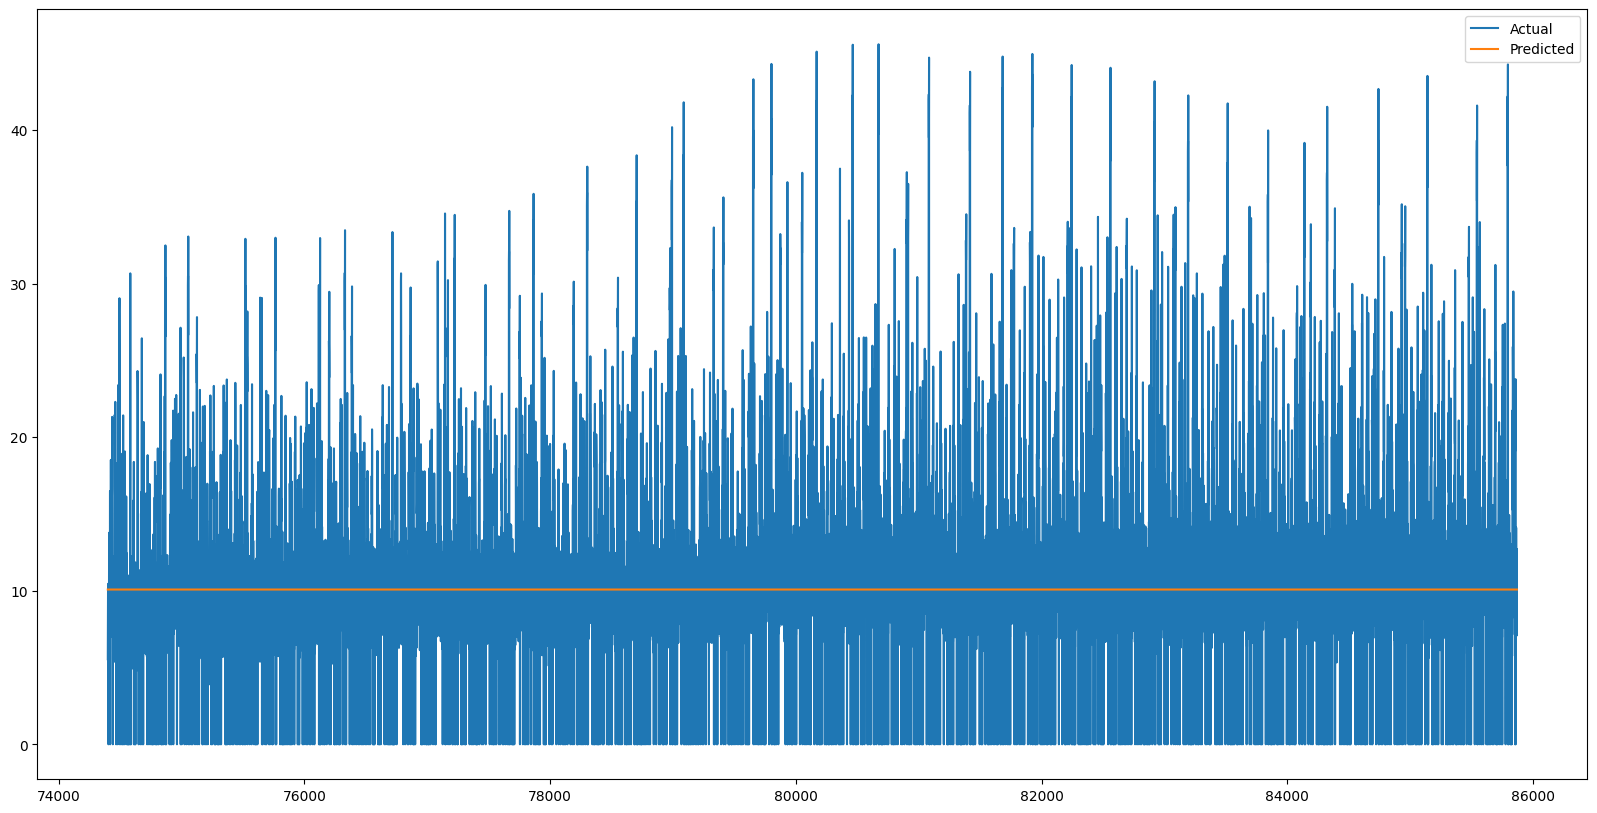

In [134]:
# making a plot to see actual vs predicted values
plt.figure(figsize=(20,10))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Predicted')
plt.legend()
plt.show()


## Building Deep Learning Model


In [135]:
df_2.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,61.0,0.0,134900.974093,4.31,48.12840,1116.17208
1,2001,1,61.0,1.0,134900.974093,5.13,12.67978,247.08691
2,2001,1,61.0,2.0,134900.974093,3.26,19.60858,602.30484
3,2001,1,61.0,3.0,134900.974093,4.75,0.76868,16.17442
4,2001,1,61.0,4.0,134900.974093,6.01,15.07136,250.60591


In [136]:
df_2.nunique()

year                   24
month                  12
stateDescription       62
sectorName              6
customers           45100
price                2943
revenue             78693
sales               79292
dtype: int64

In [137]:
df_2.describe()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
count,85870.000000,85870.000000,85870.000000,85870.000000,8.587000e+04,85870.000000,85870.000000,85870.000000
mean,2012.043321,6.480144,30.500000,2.365343,2.916013e+06,9.300193,586.627155,5980.048970
std,6.660304,3.461589,17.895634,1.824263,1.089245e+07,5.010382,2161.047702,21302.453181
min,2001.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,-0.000010,0.000000
25%,2006.000000,3.000000,15.000000,1.000000,2.737375e+04,6.650000,29.475195,289.144572
50%,2012.000000,6.000000,30.500000,2.000000,5.198785e+05,8.840000,121.641500,1447.518085
75%,2018.000000,9.000000,46.000000,4.000000,2.183882e+06,11.380000,421.320628,4339.950965
max,2024.000000,12.000000,61.000000,5.000000,1.625050e+08,116.670000,52361.450970,391900.008970


In [139]:
# excluding my target variable
y = df_2['price']
X = df_2.drop(columns = ['price'])

In [140]:
X.head()

,year,month,stateDescription,sectorName,customers,revenue,sales
0,2001,1,61.0,0.0,134900.974093,48.12840,1116.17208
1,2001,1,61.0,1.0,134900.974093,12.67978,247.08691
2,2001,1,61.0,2.0,134900.974093,19.60858,602.30484
3,2001,1,61.0,3.0,134900.974093,0.76868,16.17442
4,2001,1,61.0,4.0,134900.974093,15.07136,250.60591


In [141]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85870 entries, 0 to 85869
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              85870 non-null  int64  
 1   month             85870 non-null  int64  
 2   stateDescription  85870 non-null  float64
 3   sectorName        85870 non-null  float64
 4   customers         85870 non-null  float64
 5   revenue           85870 non-null  float64
 6   sales             85870 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 4.6 MB


In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df_2.drop(columns = ['price']))
X

array([[-1.6580903 , -1.58313901,  1.70433621, ..., -0.2553263 ,
        -0.24918556, -0.22832606],
       [-1.6580903 , -1.58313901,  1.70433621, ..., -0.2553263 ,
        -0.2655891 , -0.26912372],
       [-1.6580903 , -1.58313901,  1.70433621, ..., -0.2553263 ,
        -0.26238286, -0.25244865],
       ...,
       [ 1.79522559, -1.58313901, -1.53669658, ..., -0.26450243,
        -0.22058901, -0.20781862],
       [ 1.79522559, -1.58313901, -1.53669658, ..., -0.1323783 ,
        -0.16259022, -0.18249118],
       [ 1.79522559, -1.58313901, -1.53669658, ..., -0.267711  ,
        -0.27145539, -0.28072184]])

In [144]:
# scaling the target variable
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

y_scaled[:20]

array([[-0.9959764 ],
       [-0.83231526],
       [-1.2055425 ],
       [-0.90815822],
       [-0.65667891],
       [ 0.2853706 ],
       [-0.54491032],
       [-0.38723678],
       [-0.68861279],
       [-0.66865411],
       [-0.9959764 ],
       [-1.16362928],
       [-0.55488966],
       [-0.74050535],
       [-0.62674089],
       [-0.99996813],
       [-0.15771201],
       [-0.63672023],
       [-0.47904669],
       [-0.32935662]])

In [145]:
from joblib import dump

# save the scaler
dump(scaler, 'feature_scaler.joblib')
dump(y_scaler, 'price_scaler.joblib')

['price_scaler.joblib']

In [146]:
!nvidia-smi

Fri Apr 12 19:21:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.29                 Driver Version: 546.29       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   69C    P8               5W /  88W |   5457MiB /  6144MiB |      4%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [149]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Convert an array of values into a dataset matrix
def create_dataset(X, y, look_back=1):
    dataX, dataY = [], []
    for i in range(len(X)-look_back-1):
        a = X[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(y[i + look_back])
    return np.array(dataX), np.array(dataY)

# setting lookback to 3 since we know that the data doesn't have a long term relationship with each other.
look_back = 3
trainX, trainY = create_dataset(X, y_scaled, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 3, trainX.shape[2]))


In [150]:
trainX.shape

(85866, 3, 7)

In [151]:
trainX[:1]

array([[[-1.6580903 , -1.58313901,  1.70433621, -1.29660957,
         -0.2553263 , -0.24918556, -0.22832606],
        [-1.6580903 , -1.58313901,  1.70433621, -0.74843977,
         -0.2553263 , -0.2655891 , -0.26912372],
        [-1.6580903 , -1.58313901,  1.70433621, -0.20026998,
         -0.2553263 , -0.26238286, -0.25244865]]])

In [152]:
trainY[:1]

array([[-0.90815822]])

In [172]:
# Create and fit the LSTM network
import keras
from keras import initializers

model = Sequential()
model.add(LSTM(64,input_shape=(trainX.shape[1], trainX.shape[2]), activation='relu', return_sequences=True, kernel_initializer=initializers.Orthogonal(gain=1.0), recurrent_initializer=initializers.Orthogonal(gain=1.0)))
model.add(LSTM(64, activation='relu', return_sequences=False, kernel_initializer=initializers.Orthogonal(gain=1.0), recurrent_initializer=initializers.Orthogonal(gain=1.0)))
model.add(Dense(1))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 64)             18432     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 51,521
Trainable params: 51,521
Non-trainable params: 0
_________________________________________________________________


In [173]:
# splitting data
train_size = last
train_X, test_X = trainX[0:train_size], trainX[train_size:len(df)]
train_y, test_y = trainY[0:train_size], trainY[train_size:len(df)]

In [174]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((74399, 3, 7), (11467, 3, 7), (74399, 1), (11467, 1))

In [175]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_X, train_y, epochs=8, batch_size=32, validation_data=(test_X, test_y))

Epoch 1/8
2325/2325 [==============================] - 119s 49ms/step - loss: 0.6563 - val_loss: 1.0956
Epoch 2/8
2325/2325 [==============================] - 111s 48ms/step - loss: 0.5119 - val_loss: 0.7959
Epoch 3/8
2325/2325 [==============================] - 87s 37ms/step - loss: 0.4362 - val_loss: 0.7028
Epoch 4/8
2325/2325 [==============================] - 100s 43ms/step - loss: 0.4003 - val_loss: 0.6718
Epoch 5/8
2325/2325 [==============================] - 121s 52ms/step - loss: 0.3768 - val_loss: 0.5541
Epoch 6/8
2325/2325 [==============================] - 102s 44ms/step - loss: 0.3575 - val_loss: 0.5467
Epoch 7/8
2325/2325 [==============================] - 117s 50ms/step - loss: 0.3444 - val_loss: 0.5585
Epoch 8/8
2325/2325 [==============================] - 101s 43ms/step - loss: 0.3321 - val_loss: 0.5208


In [176]:
# Make predictions
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X)

359/359 [==============================] - 2s 7ms/step


In [177]:
trainPredict.shape

(74399, 1)

In [178]:
testPredict.shape

(11467, 1)

In [179]:
# calculating rmse
print(mean_squared_error(trainPredict, train_y))

0.32666040979127847


In [180]:
# calculating rmse
print(mean_squared_error(testPredict, test_y))

0.5208387704877497


In [181]:
# tkaing the inverse to see actually what was done
inv_test_y = y_scaler.inverse_transform(test_y)
inv_test_pred_y = y_scaler.inverse_transform(testPredict)

In [182]:
inv_test_y[:20], inv_test_pred_y[:20]

(array([[ 5.27],
        [10.46],
        [ 0.  ],
        [ 7.78],
        [ 9.44],
        [ 5.17],
        [ 9.51],
        [10.9 ],
        [13.78],
        [ 5.54],
        [ 9.48],
        [12.61],
        [10.07],
        [12.76],
        [ 9.39],
        [16.49],
        [ 0.  ],
        [11.22],
        [ 9.89],
        [ 8.07]]),
 array([[ 7.7513356 ],
        [10.48701   ],
        [ 7.0917196 ],
        [10.7216835 ],
        [ 8.7883005 ],
        [ 6.195459  ],
        [ 9.615194  ],
        [ 7.95315   ],
        [10.415944  ],
        [12.115578  ],
        [10.842717  ],
        [ 8.831881  ],
        [15.700977  ],
        [ 9.559247  ],
        [ 7.406757  ],
        [12.954996  ],
        [ 0.21474732],
        [11.471843  ],
        [10.647041  ],
        [ 8.154342  ]], dtype=float32))

In [183]:
inv_test_pred_y.shape, inv_test_y.shape

((11467, 1), (11467, 1))

In [184]:
time_index = df_2.index[train_size+4:]
time_index

RangeIndex(start=74403, stop=85870, step=1)

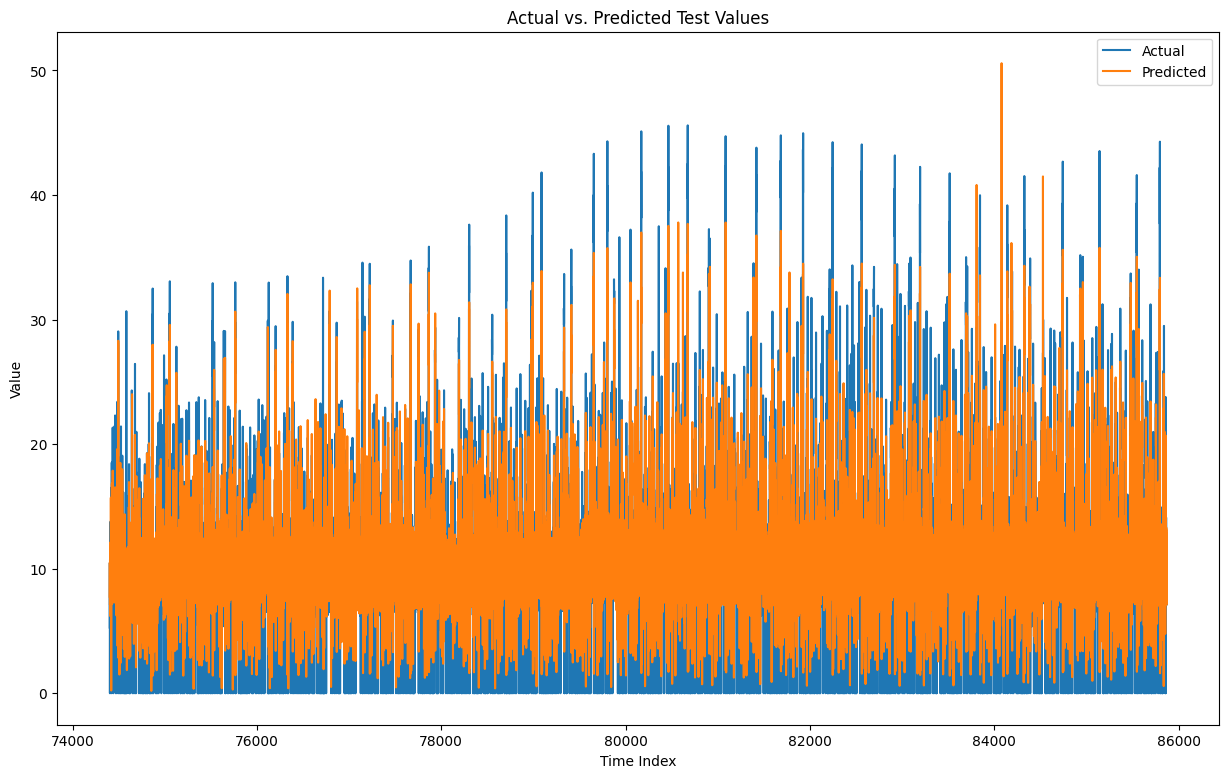

In [185]:
# Plotting
plt.figure(figsize=(15, 9))
plt.plot(time_index, inv_test_y.reshape(-1), label='Actual')
plt.plot(time_index, inv_test_pred_y.reshape(-1), label='Predicted')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Test Values')
plt.legend()
plt.show()

In [186]:
# saving the model
model.save('forecast_model.h5')

In [168]:
from keras.models import load_model

# Load the model
model = load_model('forecast_model.h5')

In [171]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0
